In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lstm-assignment/Dataset 10 (2).csv


# LSTM WITH 5 DENSE LAYERS

In [2]:
df = pd.read_csv('/kaggle/input/lstm-assignment/Dataset 10 (2).csv')

In [3]:
df.head()

,Date\t,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9
0,15-10-2011,39:55.0,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0
1,15-10-2011,39:55.6,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0
2,15-10-2011,39:57.1,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0
3,15-10-2011,39:58.6,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0
4,15-10-2011,40:02.2,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0


In [4]:
df.rename(columns ={'Date\t':'Date'}, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184670 entries, 0 to 184669
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    184670 non-null  object 
 1   Time    184670 non-null  object 
 2   P1      184670 non-null  float64
 3   P2      184670 non-null  float64
 4   P3      184670 non-null  float64
 5   P4      184670 non-null  float64
 6   P5      184670 non-null  int64  
 7   P6      184670 non-null  int64  
 8   P7      184670 non-null  int64  
 9   P8      184670 non-null  int64  
 10  P9      184670 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 15.5+ MB


In [6]:
df['Date'].unique()

array(['15-10-2011', '16-10-2011', '17-10-2011', '18-10-2011',
       '19-10-2011', '21-10-2011', '22-10-2011', '23-10-2011',
       '24-10-2011', '25-10-2011', '26-10-2011', '27-10-2011',
       '28-10-2011', '29-10-2011', '30-10-2011', '01-11-2011',
       '02-11-2011', '03-11-2011', '04-11-2011', '05-11-2011',
       '06-11-2011', '07-11-2011', '08-11-2011', '09-11-2011',
       '11-11-2011', '12-11-2011', '13-11-2011',
       '14-05+A151694:H151703-2011', '14-11-2011', '15-11-2011',
       '16-11-2011', '17-11-2011', '18-11-2011'], dtype=object)

In [7]:
df['Time'].unique()

array(['39:55.0', '39:55.6', '39:57.1', ..., '46:17.0', '28:37.0',
       '06:47.2'], dtype=object)

In [8]:
df = df[df['Date'] != '14-05+A151694:H151703-2011']
df['Date'] = df['Date']+" "+df['Time']
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y %M:%S.%f')
df.head()

,Date,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9
0,2011-10-15 00:39:55.000,39:55.0,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0
1,2011-10-15 00:39:55.600,39:55.6,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0
2,2011-10-15 00:39:57.100,39:57.1,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0
3,2011-10-15 00:39:58.600,39:58.6,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0
4,2011-10-15 00:40:02.200,40:02.2,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0


In [9]:
df = df.drop("Time",axis=1)


In [10]:
df = df.set_index('Date')
df.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9
Date,,,,,,,,,
2011-10-15 00:39:55.000,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0
2011-10-15 00:39:55.600,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0
2011-10-15 00:39:57.100,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0
2011-10-15 00:39:58.600,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0
2011-10-15 00:40:02.200,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


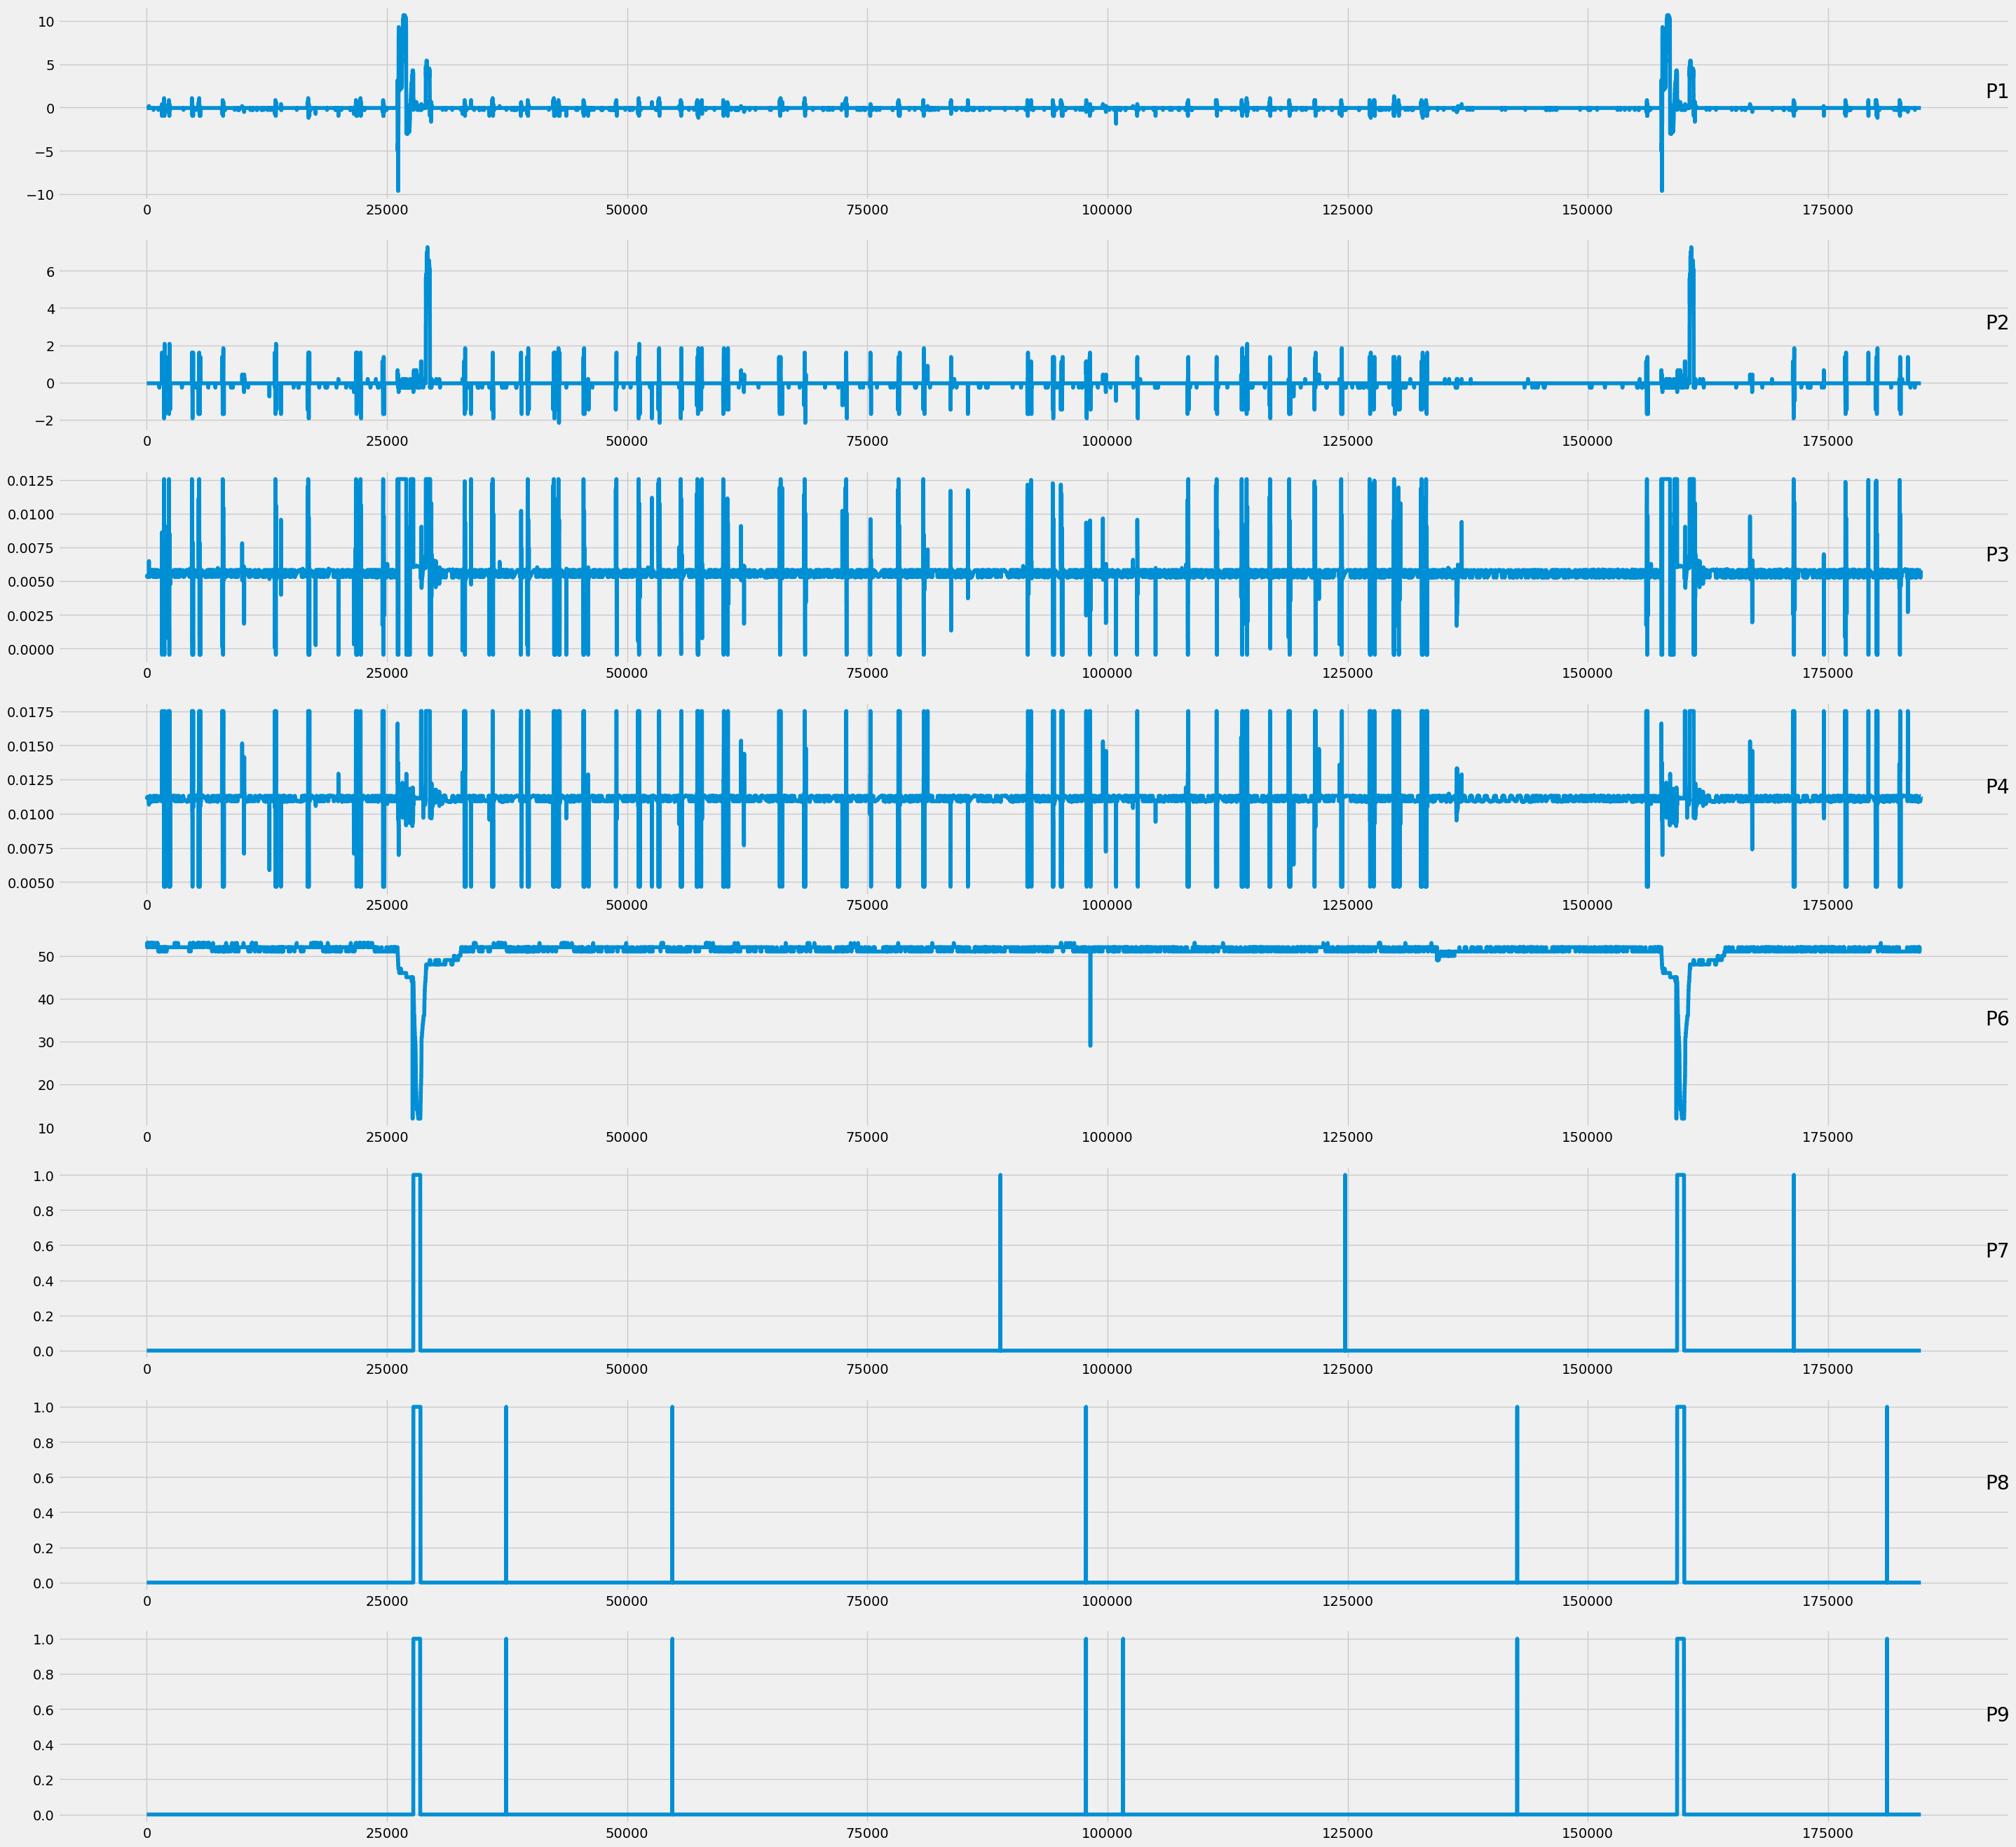

In [37]:
groups = [0, 1, 2, 3, 5, 6, 7,8]
values = df.values

i = 1
# plot each column
plt.figure(figsize=(32,32))
for group in groups:
 plt.subplot(len(groups), 1, i)
 plt.plot(values[:, group])
 plt.title(df.columns[group], y=0.5, loc='right')
 i += 1
plt.show()

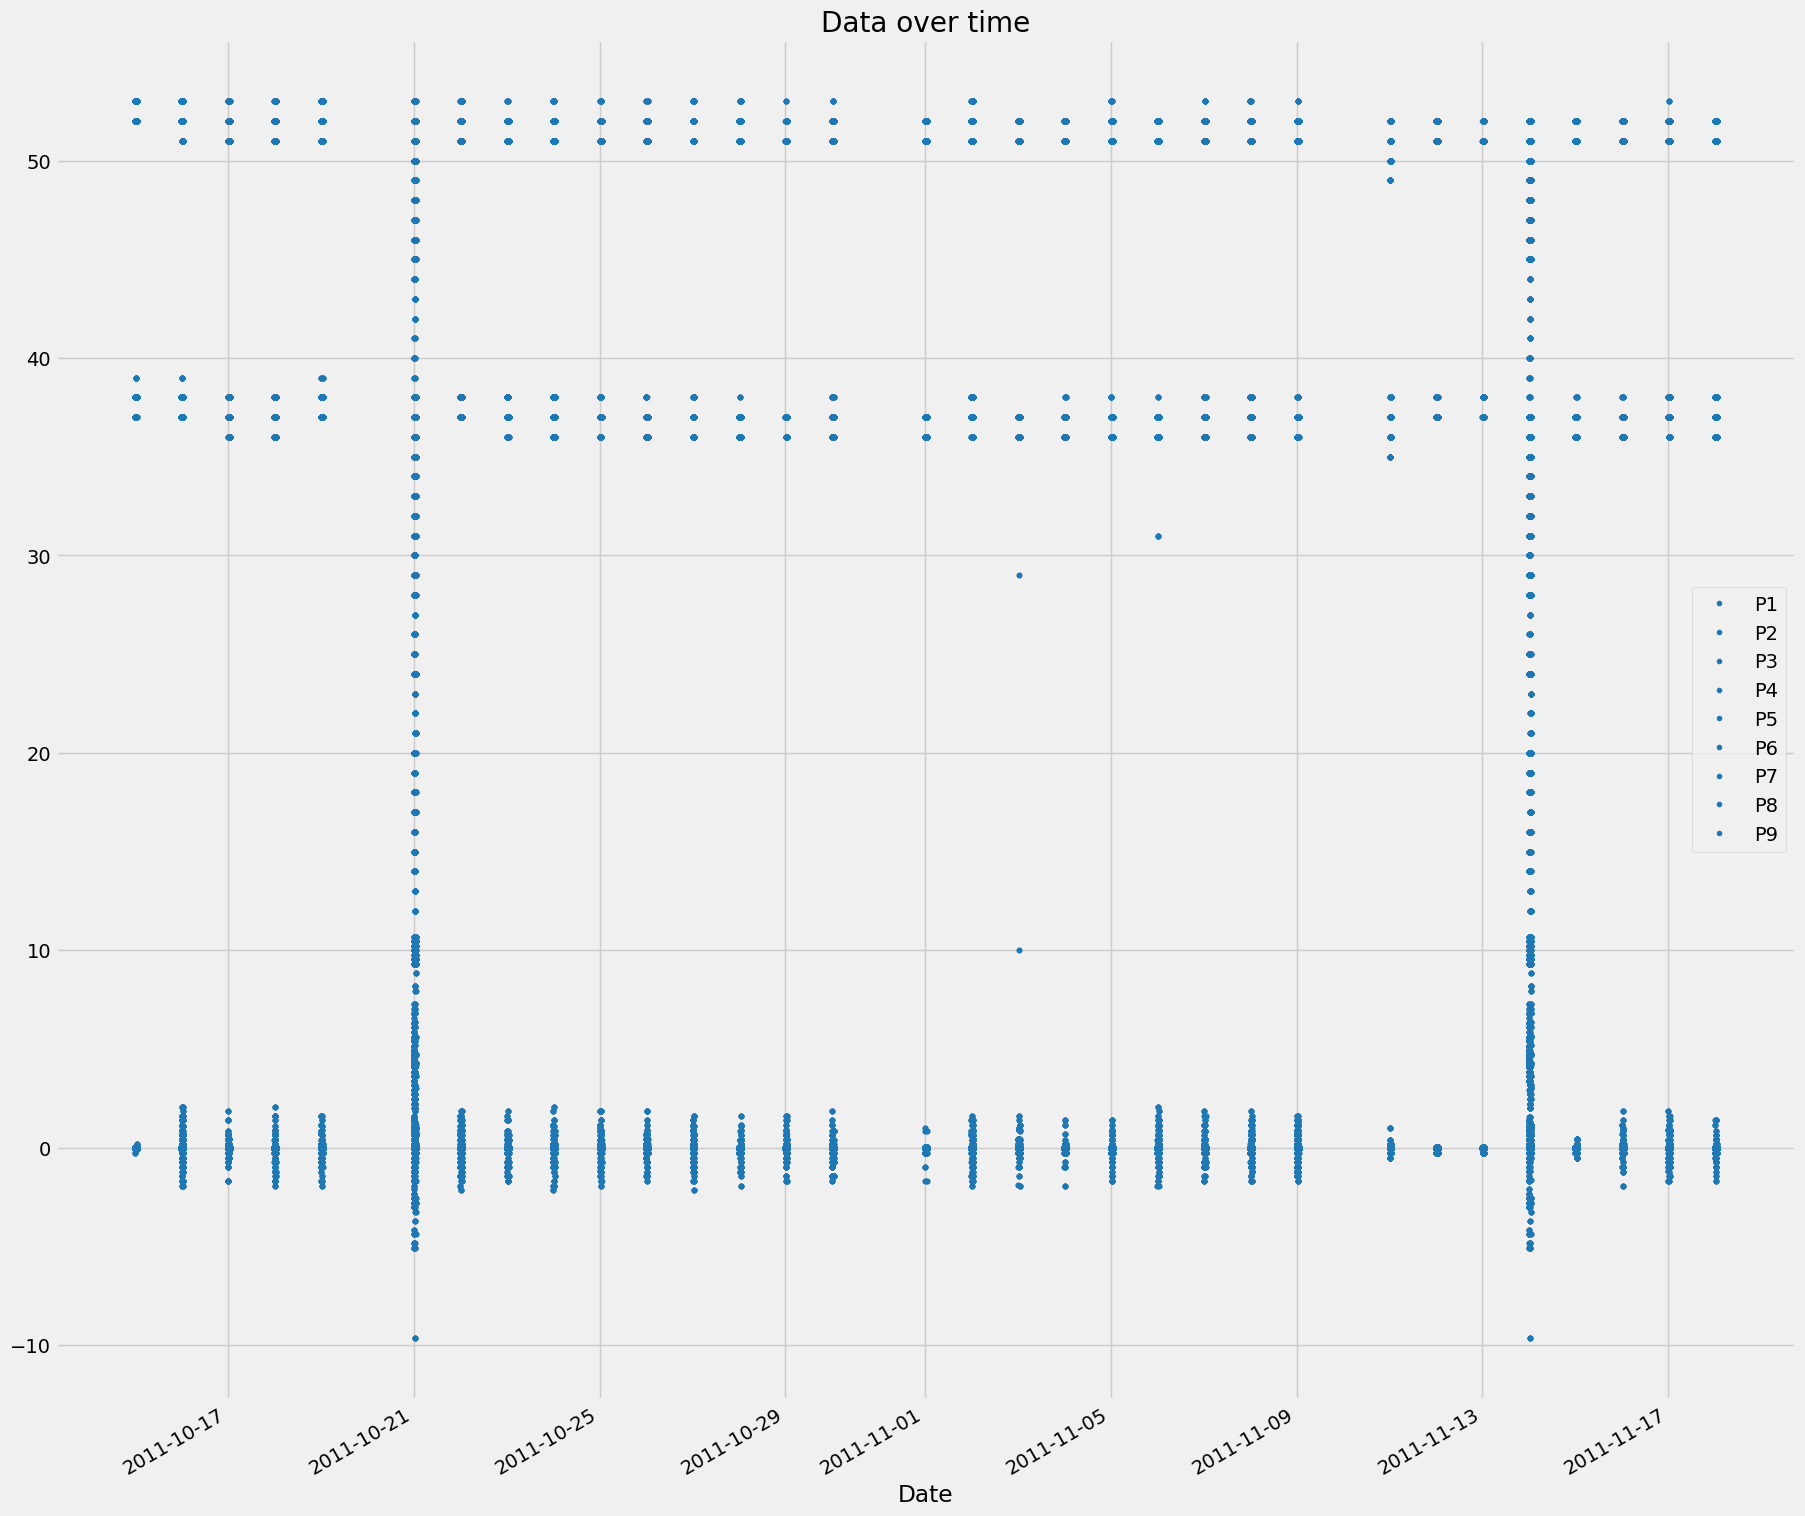

In [40]:
df.plot(style='.',
        figsize=(20,20),
        color=color_pal[0],
        title='Data over time')
plt.show()


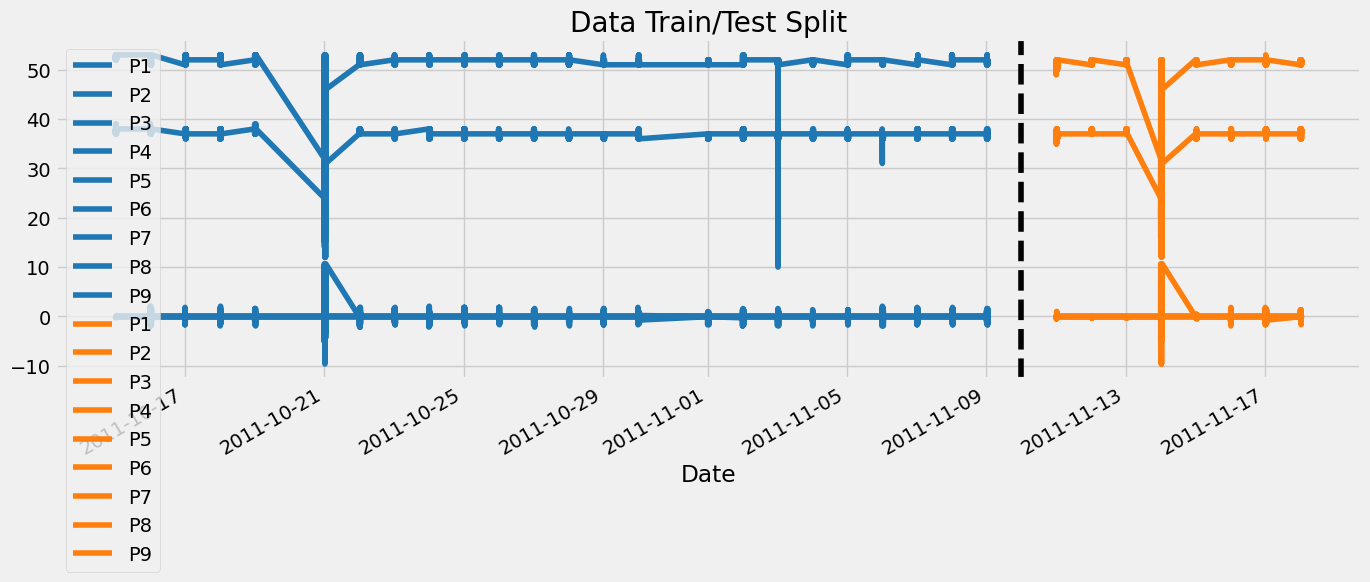

In [13]:
train = df.loc[df.index < '2011-11-10']
test = df.loc[df.index >= '2011-11-10']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split',color=color_pal[0])
test.plot(ax=ax, label='Test Set',color=color_pal[1])
ax.axvline('2011-11-10', color='black', ls='--')
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.fit_transform(test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

In [17]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [18]:
scaled_train

array([[0.47191011, 0.225     , 0.45119139, ..., 0.        , 0.        ,
        0.        ],
       [0.47191011, 0.225     , 0.45119139, ..., 0.        , 0.        ,
        0.        ],
       [0.47191011, 0.225     , 0.45119139, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.47191011, 0.225     , 0.48193697, ..., 0.        , 0.        ,
        0.        ],
       [0.47191011, 0.225     , 0.48193697, ..., 0.        , 0.        ,
        0.        ],
       [0.47191011, 0.225     , 0.48193697, ..., 0.        , 0.        ,
        0.        ]])

In [19]:
n_input = 1
n_features = 9
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=32)

In [20]:
X,y = generator[2]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.47191011 0.225      0.44657955 0.50582751 0.96551724 0.97560976
 0.         0.         0.         0.47191011 0.225      0.44657955
 0.50582751 0.96551724 0.97560976 0.         0.         0.
 0.47191011 0.225      0.44657955 0.50582751 0.96551724 0.97560976
 0.         0.         0.         0.47191011 0.225      0.44657955
 0.50582751 0.96551724 0.97560976 0.         0.         0.
 0.47191011 0.225      0.44657955 0.50582751 0.96551724 1.
 0.         0.         0.         0.47191011 0.225      0.44657955
 0.50582751 0.96551724 1.         0.         0.         0.
 0.47191011 0.225      0.44657955 0.50582751 0.96551724 1.
 0.         0.         0.         0.47191011 0.225      0.44657955
 0.50582751 0.96551724 1.         0.         0.         0.
 0.47191011 0.225      0.44657955 0.50582751 0.96551724 1.
 0.         0.         0.         0.47191011 0.225      0.44657955
 0.50582751 0.96551724 1.         0.         0.         0.
 0.47191011 0.225      0.44657955 0.50582

In [21]:
X.shape

(32, 1, 9)

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [23]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(64, activation='relu'))  # Additional Dense layer 1
model.add(Dense(32, activation='relu'))  # Additional Dense layer 2
model.add(Dense(16, activation='relu'))  # Additional Dense layer 3
model.add(Dense(8, activation='relu'))   # Additional Dense layer 4
model.add(Dense(9))  # Output Dense layer with 9 units
model.compile(optimizer='adam', loss='mse')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               44000     
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 9)                 81        
                                                                 
Total params: 53289 (208.16 KB)
Trainable params: 53289 

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [30]:
his = model.fit(generator,epochs=30,callbacks=[early_stopping, model_checkpoint])

Epoch 1/30
4197/4197 [==============================] - 25s 6ms/step - loss: 2.6863e-04
Epoch 2/30
4197/4197 [==============================] - 24s 6ms/step - loss: 2.6828e-04
Epoch 3/30
4197/4197 [==============================] - 24s 6ms/step - loss: 2.6990e-04
Epoch 4/30
4197/4197 [==============================] - 24s 6ms/step - loss: 2.6435e-04
Epoch 5/30
4197/4197 [==============================] - 24s 6ms/step - loss: 2.6666e-04
Epoch 6/30
4197/4197 [==============================] - 24s 6ms/step - loss: 2.5511e-04
Epoch 7/30
4197/4197 [==============================] - 24s 6ms/step - loss: 2.5237e-04
Epoch 8/30
4197/4197 [==============================] - 24s 6ms/step - loss: 2.5544e-04
Epoch 9/30
4197/4197 [==============================] - 24s 6ms/step - loss: 2.5577e-04
Epoch 10/30
4197/4197 [==============================] - 24s 6ms/step - loss: 2.4437e-04
Epoch 11/30
4197/4197 [==============================] - 24s 6ms/step - loss: 2.5316e-04
Epoch 12/30
4197/4197 [=======

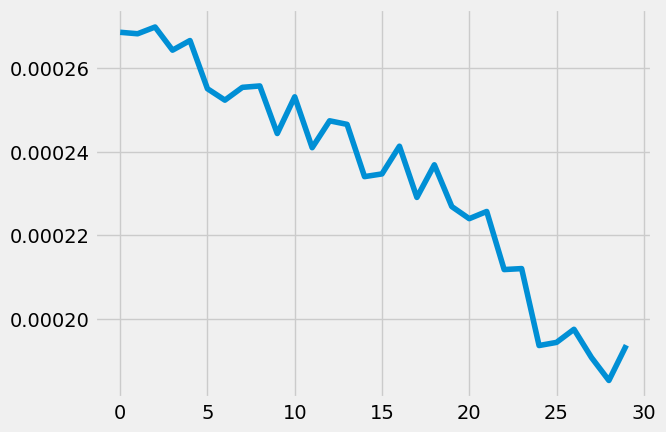

In [31]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [32]:
test = df.loc[df.index >= '2011-11-10']
test.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9
Date,,,,,,,,,
2011-11-11 00:00:23.100,-0.0469,-0.0385,0.00526,0.01111,35,49,0,0,0
2011-11-11 00:00:28.200,-0.0469,-0.0385,0.00526,0.01111,35,49,0,0,0
2011-11-11 00:00:29.700,-0.0469,-0.0385,0.00526,0.01111,35,49,0,0,0
2011-11-11 00:00:31.200,-0.0469,-0.0385,0.00526,0.01111,35,49,0,0,0
2011-11-11 00:00:32.300,-0.0469,-0.0385,0.00526,0.01111,35,49,0,0,0


In [43]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [44]:
current_batch

array([[[0.47191011, 0.225     , 0.48193697, 0.51748252, 0.93103448,
         0.95121951, 0.        , 0.        , 0.        ]]])

In [ ]:
for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 19ms/step


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - ETA: 0s

In [46]:
test_predictions

[array([ 4.7212988e-01,  2.3361935e-01,  4.8370555e-01,  5.1531231e-01,
         9.1955984e-01,  9.5583153e-01,  3.1445175e-04, -7.3838606e-04,
         1.0467991e-03], dtype=float32),
 array([ 4.7511116e-01,  2.3672347e-01,  4.8331183e-01,  5.2151239e-01,
         9.1447014e-01,  9.5259929e-01,  2.8037652e-04, -7.7596679e-04,
         1.0034014e-03], dtype=float32),
 array([ 4.7797352e-01,  2.3881577e-01,  4.8918152e-01,  5.3014207e-01,
         9.0905708e-01,  9.4836259e-01,  2.4765264e-04, -7.0694089e-04,
         8.9416280e-04], dtype=float32),
 array([ 4.8071200e-01,  2.4087290e-01,  5.0078851e-01,  5.3996009e-01,
         9.0343368e-01,  9.4345307e-01,  2.2081565e-04, -5.5174157e-04,
         7.2660670e-04], dtype=float32),
 array([ 4.8334309e-01,  2.4309723e-01,  5.1726270e-01,  5.5074447e-01,
         8.9777565e-01,  9.3813324e-01,  1.9770395e-04, -3.3178180e-04,
         5.1239319e-04], dtype=float32),
 array([ 4.8587504e-01,  2.4551152e-01,  5.3766930e-01,  5.6242508e-01,
   

In [47]:
true_predictions = scaler.inverse_transform(test_predictions)

In [48]:
true_predictions.shape

(45185, 9)

In [50]:
test = test.iloc[:45185, :]

In [51]:
test.shape

(45185, 9)

In [52]:
for i in range(9):
    test['Ppred'+str(i+1)]=true_predictions[:,i]
test.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,Ppred1,Ppred2,Ppred3,Ppred4,Ppred5,Ppred6,Ppred7,Ppred8,Ppred9
Date,,,,,,,,,,,,,,,,,,
2011-11-11 00:00:23.100,-0.0469,-0.0385,0.00526,0.01111,35,49,0,0,0,-0.042437,0.223288,0.005843,0.011282,36.149876,51.189093,0.000314,-0.000738,0.001047
2011-11-11 00:00:28.200,-0.0469,-0.0385,0.00526,0.01111,35,49,0,0,0,0.018113,0.251810,0.005838,0.011362,36.032813,51.056571,0.000280,-0.000776,0.001003
2011-11-11 00:00:29.700,-0.0469,-0.0385,0.00526,0.01111,35,49,0,0,0,0.076247,0.271035,0.005914,0.011473,35.908313,50.882866,0.000248,-0.000707,0.000894
2011-11-11 00:00:31.200,-0.0469,-0.0385,0.00526,0.01111,35,49,0,0,0,0.131865,0.289937,0.006065,0.011599,35.778975,50.681576,0.000221,-0.000552,0.000727
2011-11-11 00:00:32.300,-0.0469,-0.0385,0.00526,0.01111,35,49,0,0,0,0.185302,0.310375,0.006280,0.011738,35.648840,50.463463,0.000198,-0.000332,0.000512


In [53]:
from sklearn.metrics import mean_squared_error


In [55]:
columns_to_compare = [('P1', 'Ppred1'), ('P2', 'Ppred2'), ('P3', 'Ppred3'), ('P4', 'Ppred4'), ('P5', 'Ppred5'),
                     ('P6', 'Ppred6'), ('P7', 'Ppred7'), ('P8', 'Ppred8'), ('P9', 'Ppred9')]

# Calculating MSE for each pair of columns
for col, pred_col in columns_to_compare:
    actual = test[col]
    predicted = test[pred_col]

    mse = mean_squared_error(actual, predicted)
    print(f'MSE between {col} and {pred_col}: {mse:.4f}')

MSE between P1 and Ppred1: 18.8305
MSE between P2 and Ppred2: 23.8992
MSE between P3 and Ppred3: 0.0001
MSE between P4 and Ppred4: 0.0000
MSE between P5 and Ppred5: 34.2335
MSE between P6 and Ppred6: 33.5619
MSE between P7 and Ppred7: 0.0162
MSE between P8 and Ppred8: 0.0168
MSE between P9 and Ppred9: 0.0161


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

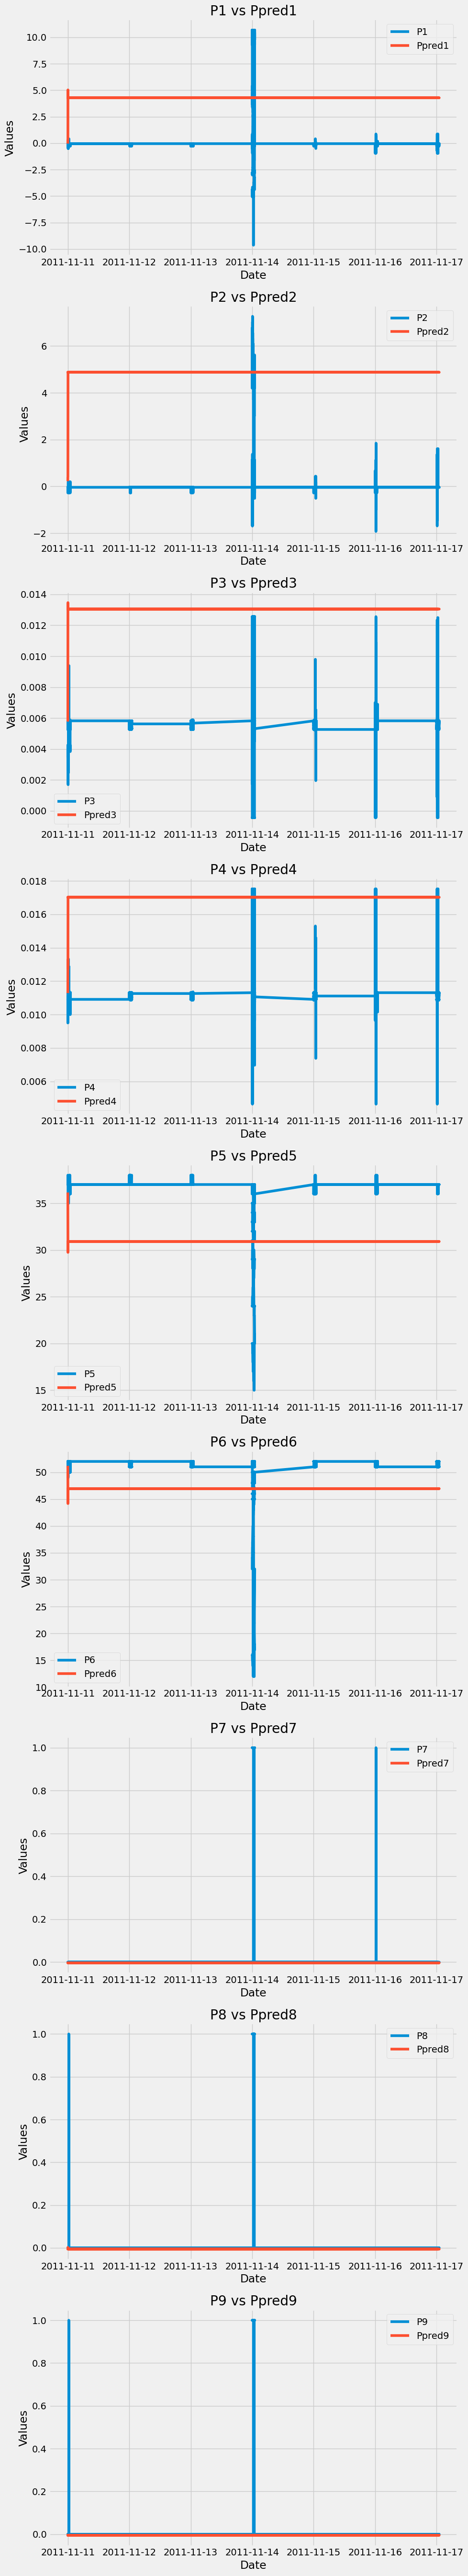

In [56]:
# Selecting columns to plot
columns_to_plot = [('P1', 'Ppred1'), ('P2', 'Ppred2'), ('P3', 'Ppred3'), ('P4', 'Ppred4'), ('P5', 'Ppred5'),
                   ('P6', 'Ppred6'), ('P7', 'Ppred7'), ('P8', 'Ppred8'), ('P9', 'Ppred9')]

# Plotting each pair of columns in individual subplots
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(10, 6 * len(columns_to_plot)))
for i, (col, pred_col) in enumerate(columns_to_plot):
    axs[i].plot(test.index, test[col], label=col)
    axs[i].plot(test.index, test[pred_col], label=pred_col)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Values')
    axs[i].legend()
    axs[i].set_title(f'{col} vs {pred_col}')

plt.tight_layout()
plt.show()

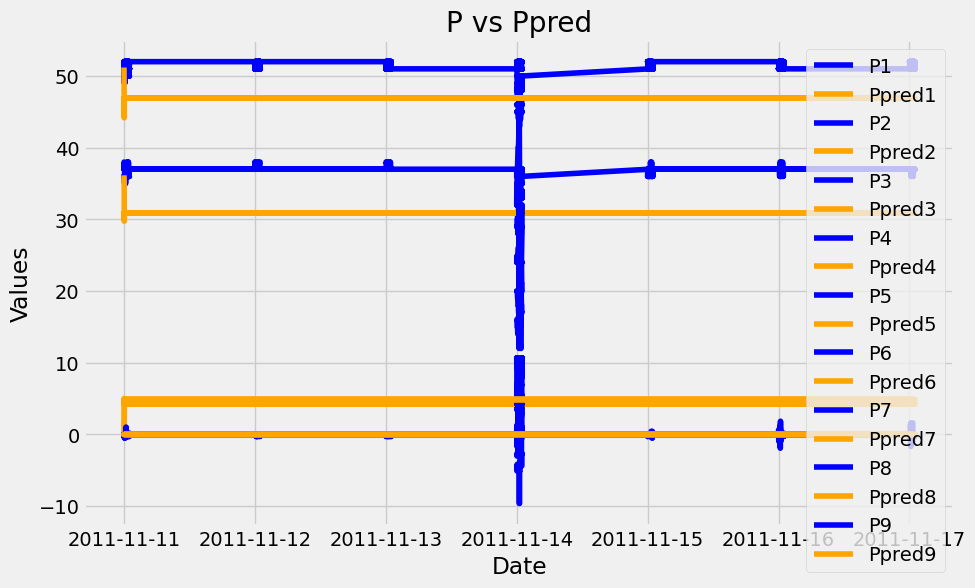

In [57]:
columns_to_plot = [('P1', 'Ppred1'), ('P2', 'Ppred2'), ('P3', 'Ppred3'), ('P4', 'Ppred4'), ('P5', 'Ppred5'),
                   ('P6', 'Ppred6'), ('P7', 'Ppred7'), ('P8', 'Ppred8'), ('P9', 'Ppred9')]

# Plotting all pairs of columns on the same plot
plt.figure(figsize=(10, 6))
for col, pred_col in columns_to_plot:
    plt.plot(test.index, test[col], label=col, color='blue')
    plt.plot(test.index, test[pred_col], label=pred_col, color='orange')
    
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.title('P vs Ppred')
plt.show()

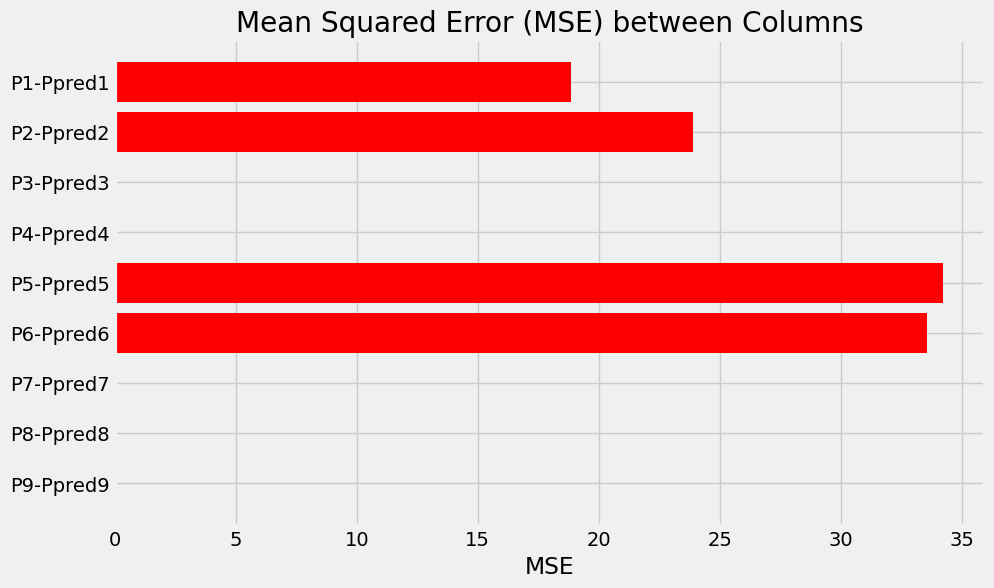

In [59]:
import matplotlib.pyplot as plt

# MSE values for each pair of columns
mse_values = [18.8305, 23.8992, 0.0001, 0.0000, 34.2335, 33.5619, 0.0162, 0.0168, 0.0161]
column_labels = ['P1-Ppred1', 'P2-Ppred2', 'P3-Ppred3', 'P4-Ppred4', 'P5-Ppred5', 'P6-Ppred6', 'P7-Ppred7', 'P8-Ppred8', 'P9-Ppred9']

# Plotting MSE values as a bar plot
plt.figure(figsize=(10, 6))
plt.barh(column_labels, mse_values, color='red')
plt.xlabel('MSE')
plt.title('Mean Squared Error (MSE) between Columns')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest MSE on top
plt.show()
